In [2]:
x = [1,3,4,7]
x

[1, 3, 4, 7]

Installing libraries:
1. statsmodels
2. arch
3. matplotlib
4. seaborn

In [3]:
!pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install arch


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [9]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [10]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

<Axes: title={'center': 'S-&-P500'}>

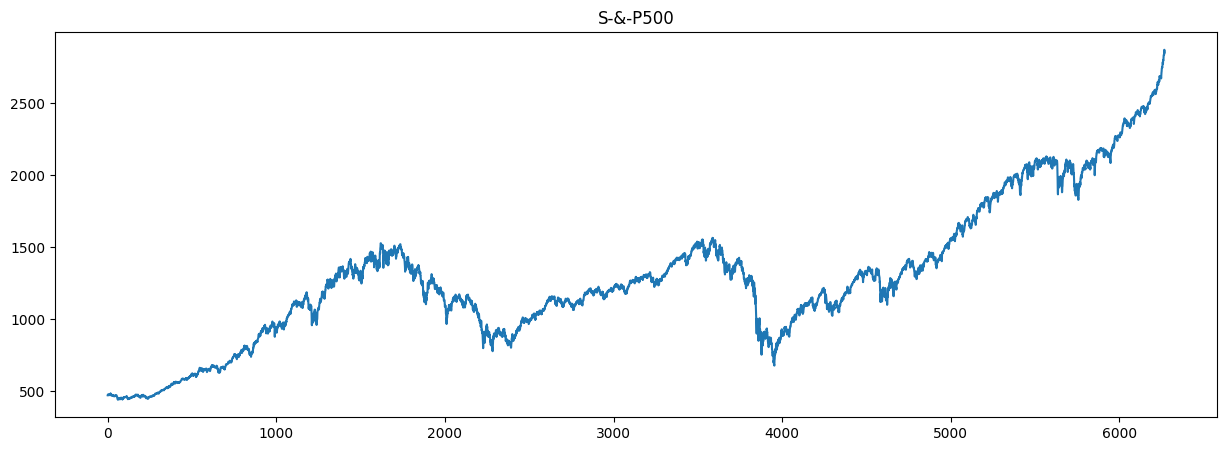

In [11]:
df_comp.spx.plot(figsize=(15,5),title='S-&-P500')

<Axes: title={'center': 'FTSE'}>

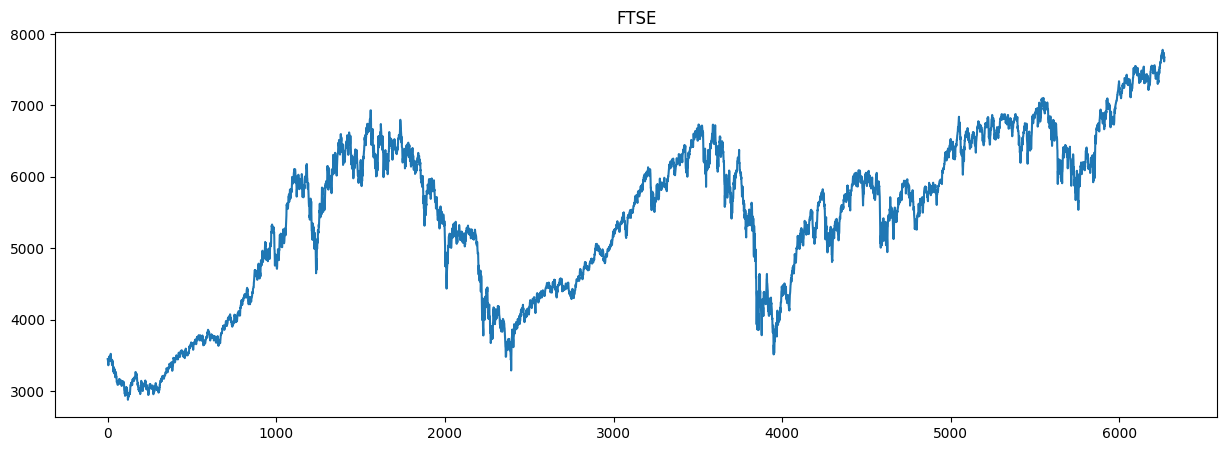

In [12]:
df_comp.ftse.plot(figsize=(15,5),title='FTSE')

Text(0.5, 1.0, 'S&P500 vs FTSE')

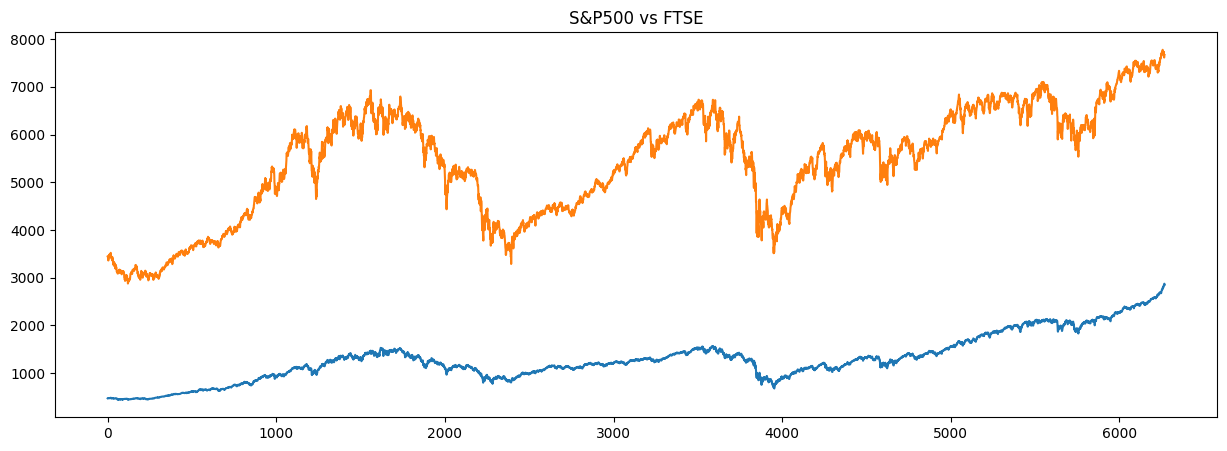

In [13]:
df_comp.spx.plot(figsize=(15,5),title='S-&-P500')
df_comp.ftse.plot(figsize=(15,5),title='FTSE')
plt.title('S&P500 vs FTSE')

In [14]:
import scipy.stats
import pylab

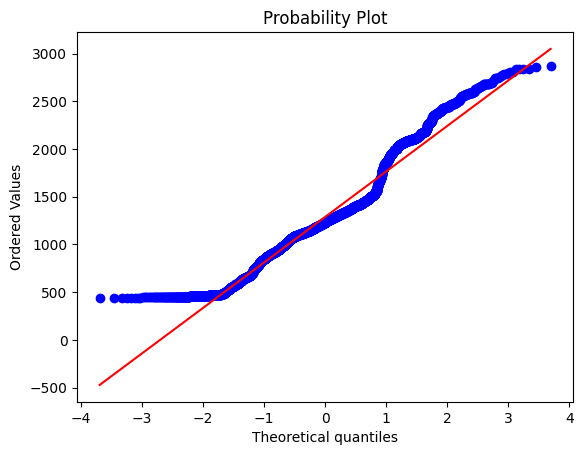

In [15]:
scipy.stats.probplot(df_comp.spx,plot=pylab)
pylab.show()

In [16]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [19]:
df_comp.date = pd.to_datetime(df_comp.date,dayfirst=True)

In [20]:
df_comp.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [21]:
df_comp.set_index("date",inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [33]:
df_comp = df_comp.asfreq('b') 
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [34]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

Filling missing values using ffill, bfill and mean

In [37]:
df_comp.spx = df_comp.spx.fillna(method='ffill')
df_comp.spx.isna().sum()

0

In [38]:
df_comp.ftse = df_comp.ftse.fillna(method='bfill')
df_comp.ftse.isna().sum()

0

In [40]:
df_comp.dax = df_comp.dax.fillna(value=df_comp.dax.mean)
df_comp.dax.isna().sum()

0

In [41]:
df_comp['market_value'] = df_comp.spx
df_comp

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01,469.900000
1994-01-10,475.270000,2225.0,3440.580000,18443.44,475.270000
1994-01-11,474.130000,2228.1,3413.770000,18485.25,474.130000
1994-01-12,474.170000,2182.06,3372.020000,18793.88,474.170000
1994-01-13,472.470000,2142.37,3360.010000,18577.26,472.470000
...,...,...,...,...,...
2018-01-23,2839.130362,13559.6,7731.827774,24124.15,2839.130362
2018-01-24,2837.544008,13414.74,7643.428966,23940.78,2837.544008
2018-01-25,2839.253031,13298.36,7615.839954,23669.49,2839.253031


In [42]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
df_comp

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031


In [43]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


Data Splitting

In [45]:
size = int(len(df_comp)*.8)
df = df_comp[:size]
df_test = df_comp[size:]

In [47]:
df

,market_value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [48]:
df_test

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
...,...
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031
